# Legolas Demo Code

Use this code to test your calibration values and as a reference for solving the challenges

In [1]:
import sys
print(sys.version)

3.12.3 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:42:21) [MSC v.1916 64 bit (AMD64)]


In [1]:
from core import *
import utils

No GPU available, using the CPU instead.


In [10]:
# this is how you reset the rpyc server when facing the port already in use
# need to change to actual host name
host_1 = "192.168.1.11"
host_2 = "192.168.1.12"

utils.restart_server(host=host_1)
utils.restart_server(host=host_2)

kill server at PID:510
restarting the rpyc server at host: 192.168.1.11
rpyc server start successfully
kill server at PID:509
restarting the rpyc server at host: 192.168.1.12
rpyc server start successfully


In [2]:
stage, depo_device, pH_device, conn1, conn2, config = load_from_config("config.yaml")

In [18]:
# it is ok if this fails, just move on to the next code block
sanity_check(stage=stage, pH_device=pH_device, depo_device=depo_device)

NameError: name 'stage' is not defined

In [1]:
# find the usb port if problem occur
list_ports = conn1.modules['serial.tools.list_ports']

ports=list_ports.comports()
for port, desc, hwid in sorted(ports):
    print(port, desc, hwid)

NameError: name 'conn1' is not defined

## Test Device Functionality

In [3]:
stage.home()

(971, -62)

In [4]:
# Go to Home Position
reset(stage=stage, pH_device=pH_device, depo_device=depo_device)
# stage.home()

KeyError: 'full_up'

In [16]:
# Drop pH meter and raise it up (don't run if pH path is obstructed)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [6]:
# Drop deposition device and raise it up (don't run if syringe path is obstructed)
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

## Testing OpenCV

In [1]:
from core import *
import utils
stage, depo_device, pH_device, conn1, conn2, config = load_from_config("final_config.yaml")

No GPU available, using the CPU instead.


moving to cell


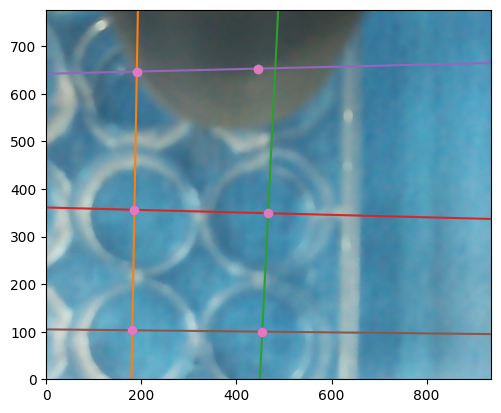

IndexError: invalid index to scalar variable.

In [2]:
stage.home()
stage.move_to_cell(0,0)

moving to cell


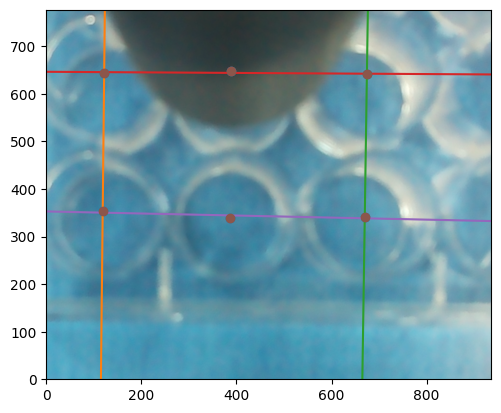

dist: 18.921768577537733
point 394,663
horiz_line[0] -0.0059626206247649196
horiz_line[1] 646.4271675902593
change needed
x_value: 271.6924694435159
y_value: 103.57823142246227
making adjustments


In [9]:
stage.move_to_cell(2, 4)

moving to cell


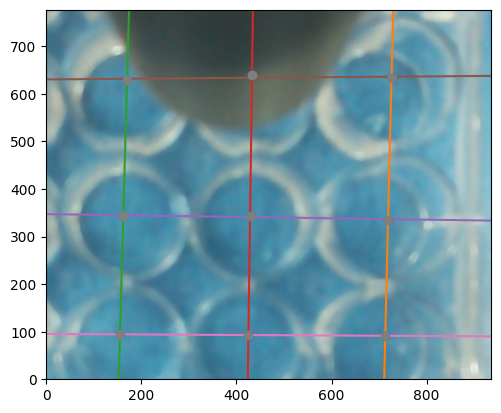

dist: 29.494334668108916
point 394,663
horiz_line[0] 0.007856146303014021
horiz_line[1] 630.4094335216141
change needed
x_value: -39.22434583986106
y_value: 93.00566533189108
making adjustments


In [7]:
stage.move_to_cell(1, 3)

moving to cell


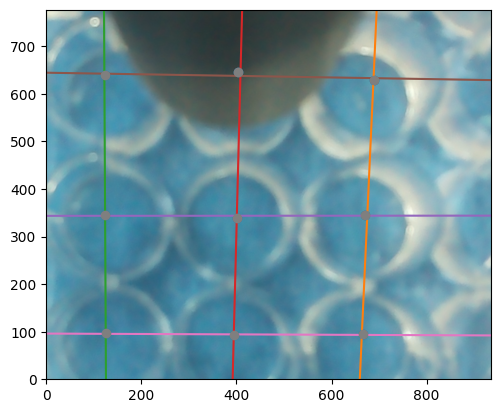

dist: 108.51097204192388
point 483,745
horiz_line[0] -0.01662245512582342
horiz_line[1] 644.5026837021375
change needed
x_value: 71.67431555937257
y_value: 0
making adjustments


In [4]:
stage.move_to_cell(2,3)

## Test Cell Mapping and Accuracy
Use this code to see if pH device is aligning with the cell map properly

If calibrated properly with the pH sensor, "stage" and "pH_device" will move the cart to the same spot

In [16]:
#stage.get_XYloc()

(-1134, -436)

moving to cell
No GPU available, using the CPU instead.


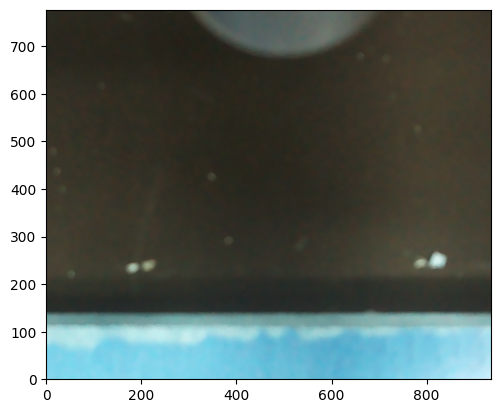

In [4]:
stage.move_to_cell(0,0)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [9]:
stage.move_to_cell(3, 5)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [ ]:
stage.move_to_cell(3, 0)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [14]:
stage.move_to_cell(0, 5)
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [15]:
stage.move_to_loc("clean")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

## Test pH device and Syringe Functionality

In [17]:
# this is the pH meter
pH_device

In [4]:
# the cleaning location can be used to wash off any acidic or basic solution from the probe prior to measurements
# it is not necessary to use this in your code, but if you are getting incorrect pH values you may need to clean with DI
pH_device.move_to_loc("clean")
pH_device.to_zpos("full_down")
pH_device.to_zpos("full_up")

In [22]:
# this runs the pH measuring loop, where the value passed to the function is the amount of time spent in the well
# it is suggested to measure for at least 20 seconds to let the pH measurement stabilize
pH_device.move_to_cell(row=0, col=0)
pH_device.pH_measure(20)

pH is Measured as: 3.78


3.78

In [4]:
# this is the syringe
depo_device

In [18]:
# go to acid well and test range of motion
depo_device.move_to_loc("acid")
depo_device.to_zpos("full_down")
depo_device.to_zpos("full_up")

In [5]:
# acquire 0.5 mL from the acid reservoir
depo_device.acquire(0.6, location="acid")

TimeoutError: result expired

In [27]:
# deposit the 0.5 mL into the 0,0 sample well
depo_device.deposition(0.6, row=0, col=0)

## Example Loops

Use these loops as a reference for ways to construct your autonomous experiments and the functions needed

In [19]:
depo_device.acquire(0.6, location="acid")
depo_device.deposition(0.1, row=0, col=1)
depo_device.deposition(0.2, row=0, col=2)
depo_device.deposition(0.3, row=0, col=3)

ValueError: A value (0.1) in x_new is below the interpolation range's minimum value (0.6).

In [9]:
depo_device.to_zpos("full_up")

TimeoutError: result expired

In [20]:
for row in range(4):
    for col in range(6):
        depo_device.acquire(0.6, location="acid")
        depo_device.deposition(0.6, row=row, col=col)
        pH_device.move_to_cell(row=row, col=col)
        pH = pH_device.pH_measure(stable_time=1)
        print(f"row {row} col {col} pH {pH}")

pH is Measured as: 7.41
row 0 col 0 pH 7.41
pH is Measured as: 7.39
row 0 col 1 pH 7.39
pH is Measured as: 7.39
row 0 col 2 pH 7.39
pH is Measured as: 7.39
row 0 col 3 pH 7.39
pH is Measured as: 7.39
row 0 col 4 pH 7.39
pH is Measured as: 7.40
row 0 col 5 pH 7.4
pH is Measured as: 7.36
row 1 col 0 pH 7.36
pH is Measured as: 7.36
row 1 col 1 pH 7.36
pH is Measured as: 7.35
row 1 col 2 pH 7.35
pH is Measured as: 7.35
row 1 col 3 pH 7.35


KeyboardInterrupt: 

In [7]:
#pH_device.pH_positions

{'full_down': 634, 'full_up': 831}

In [6]:
#pH_device.motor_pH.get_position()

1946

In [ ]:
row = 5
for col in range(8):
    depo_device.acquire(0.6, location="acid")
    depo_device.deposition(0.6, row=row, col=col)
    pH_device.move_to_cell(row=row, col=col)
    pH = pH_device.pH_measure(stable_time=20)
    print(f"row {row} col {col} pH {pH}")